# Grupo 6
---

- Vasco Varas
- Tomás Oyaneder
- Benjamin Jofre

In [1]:
import math
import random

import numpy as np

with open('P2grupo_6.csv', 'r') as f:
    data = list(map(lambda x: (float(x[0]), float(x[1]), float(x[2])), [x.split(',') for x in f.read().split('\n')][:-1]))

## A)

$\sigma '(t) = \frac{1}{\cosh^2(t)^2} = 1 - \tanh^2(t) = \sech^2(t)$

## B)

In [2]:
def J(a, b, c, d, e):
    retVal = 0

    for element in data:
        retVal += (element[2]-math.tanh(c * math.tanh(a*element[0] + b*element[1] + d) + e))**2

    return retVal/len(data)

In [3]:
def sech2(x):
    return (1/np.cosh(x))**2

def ddxJ(a, b, c, d, e):
    ga = 0
    gb = 0
    gc = 0
    gd = 0
    ge = 0
    for element in data:
        u = element[0]
        v = element[1]
        w = element[2]

        ga += -2*c*u*sech2(d+a*u+b*v) * sech2(e+c*math.tanh(d + a*u +b*v)) * (w-math.tanh(e+c*math.tanh(d+a*u+b*v)))
        gb += -2*c*v*sech2(d+a*u+b*v)*sech2(e+c*math.tanh(d+a*u+b*v)) * (w-math.tanh(e+c*math.tanh(d+a*u+b*v)))
        gc += -2*sech2(e+c*math.tanh(d+a*u+b*v))*math.tanh(d+a*u+b*v)*(w-math.tanh(e+c*math.tanh(d+a*u+b*v)))
        gd += -2*c*sech2(d+a*u+b*v)*sech2(e+c*math.tanh(d+a*u+b*v))*(w-math.tanh(e+c*math.tanh(d+a*u+b*v)))
        ge += -2*sech2(e+c*math.tanh(d+a*u+b*v))*(w-math.tanh(e+c*math.tanh(d+a*u+b*v)))

    ga /= len(data)
    gb /= len(data)
    gc /= len(data)
    gd /= len(data)
    ge /= len(data)
    return ga, gb, gc, gd, ge

In [4]:
print("Gradient:", ddxJ(1,2,3,4,5))

Gradient: (0.008455998406167581, -0.014170178055707347, -0.014585205554887149, 0.003685798009212804, 0.015271238918586283)


## C)

In [5]:
a,b,c,d,e = random.random()*10-5, random.random()*10-5, random.random()*10-5, random.random()*10-5, random.random()*10-5

print(f"Starting error**2: {J(a,b,c,d,e)}")

Starting error**2: 1.720883739320461


## D)

In [6]:
errors = []
step_size = 0.1

for idx in range(1000):
    print(f"\rIteration: {idx}", end="")
    da,db,dc,dd,de = ddxJ(a,b,c,d,e)
    a -= da*step_size
    b -= db*step_size
    c -= dc*step_size
    d -= dd*step_size
    e -= de*step_size
    errors.append(J(a,b,c,d,e))

Iteration: 999

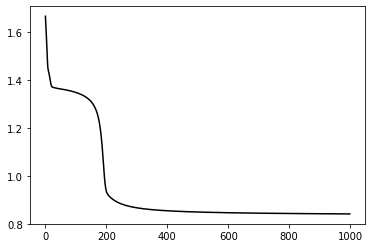

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

plt.plot(errors, color='black')

## E)

In [8]:
print(f"\rEnd error**2: {J(a,b,c,d,e)} for (a1000, b1000, c1000, d1000, e1000) = ({a},{b},{c},{d},{e})")

End error**2: 0.841077392107471 for (a1000, b1000, c1000, d1000, e1000) = (0.6166890701677887,-0.5738094169338886,1.9817339781094294,3.429882944344169,-1.7979221145298923)


## EXTRA

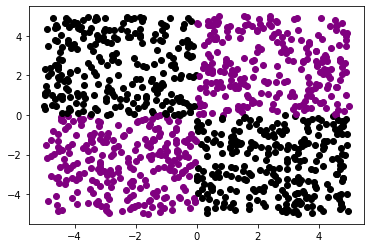

In [9]:
fig, ax = plt.subplots()

for u, v, w in data:
    plt.plot(u, v, 'o', color='purple' if w==1 else 'black')

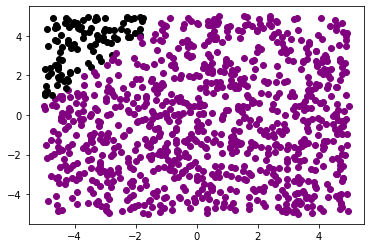

In [10]:
fig, ax = plt.subplots()

for u, v, w in data:
    plt.plot(u, v, 'o', color='purple' if math.tanh(c*math.tanh(a*u+b*v+d))>0 else 'black')